# Casos de COVID em Quixadá-CE

Analisando os dados de COVID-19 na cidade de Quixadá-CE.

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

In [5]:
# Modificar para que essa parte seja rodada apenas localmente

df = pd.read_csv('caso.csv')
# df.dtypes
# df.info()
# df.head()

# Filtrar os dados do Ceará e depois salvar como csv.
# Se faz necessário pois o arquivo completo é muito grande para enviar para o github
casos_ce = df[df.state == 'CE']
casos_ce.to_csv('casos_ce.csv', index=False)

# Liberando o dataframe original
del df

In [6]:
# Carregando os dados do Ceará no novo dataframe
casos_ce = pd.read_csv('casos_ce.csv')

In [7]:
# Fazendo cast da coluna date para data
casos_ce['date'] = pd.to_datetime(casos_ce['date'])

In [8]:
# Olhando o dataframe
# casos_ce.info()

In [9]:
# Olhando o conteúdo do dataframe
# casos_ce.head()

In [10]:
# Olhando as cidades não nulas
# casos_ce[df_ce.city.notna()].head()

In [11]:
# Quantidade de cidades únicas
# casos_ce.city.nunique()

In [12]:
# Listando os municípios presentes no arquivo.
# casos_ce.city.unique()

In [13]:
# Olhando os dados para cidade de Quixadá
# casos_ce[(df_ce.city == 'Quixadá')].head()

In [14]:
# A condição order_for_place == 1 indica o registro mais atual
# casos_ce[(casos_ce.city == 'Quixadá') & (casos_ce.order_for_place == 1)].head(10)

Criando DataFrame com os dados da cidade de Quixadá.

In [117]:
df_qxda = df_ce[(df_ce.city == 'Quixadá')]

Selecionando apenas as colunas de data e quantidade de mortes.

In [118]:
df_plot = df_qxda[['date', 'deaths']].copy()

In [119]:
df_plot.head()

,date,deaths
1153383,2021-05-04,134
1153384,2021-05-03,120
1153385,2021-05-02,120
1153386,2021-04-30,119
1153387,2021-04-29,114


In [120]:
df_plot.set_index('date', inplace=True)

In [121]:
df_plot.head()

,deaths
date,
2021-05-04,134
2021-05-03,120
2021-05-02,120
2021-04-30,119
2021-04-29,114


In [122]:
df_plot.sort_index(ascending=False)
df_plot.tail()

,deaths
date,
2020-04-01,0
2020-03-31,0
2020-03-30,0
2020-03-29,0
2020-03-28,0


<AxesSubplot:xlabel='date'>

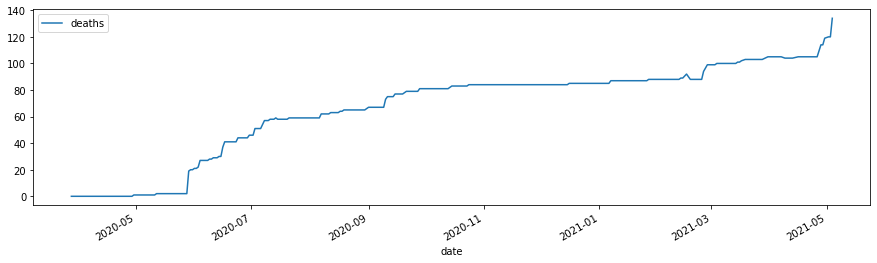

In [123]:
df_plot.plot(figsize=(15,4))

O número de mortes está acumulado, gostaria de ver a quantidade de mortes por dia. Para isto vou criar uma coluna com subtração entre duas datas seguintes.

Minha pergunta
https://stackoverflow.com/questions/67443317/add-new-column-with-difference-of-two-rows-give-settingwithcopywarning/67443348#67443348

Outro exemplo com assign
https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas


In [124]:
df_plot_2 = df_plot['deaths'].shift() - df_plot['deaths'].copy()

In [125]:
df_plot_2.head()

date
2021-05-04     NaN
2021-05-03    14.0
2021-05-02     0.0
2021-04-30     1.0
2021-04-29     5.0
Name: deaths, dtype: float64

In [126]:
# df_plot['deaths_by_day'] = df_plot.deaths.diff()

In [127]:
# df_plot[df_plot['deaths_by_day']>0]['deaths_by_day']

In [128]:
df_plot['deaths_by_day'] = df_plot_2
df_plot.tail()

,deaths,deaths_by_day
date,,
2020-04-01,0,0.0
2020-03-31,0,0.0
2020-03-30,0,0.0
2020-03-29,0,0.0
2020-03-28,0,0.0


Plotando o número de mortes por dia.

<AxesSubplot:xlabel='date'>

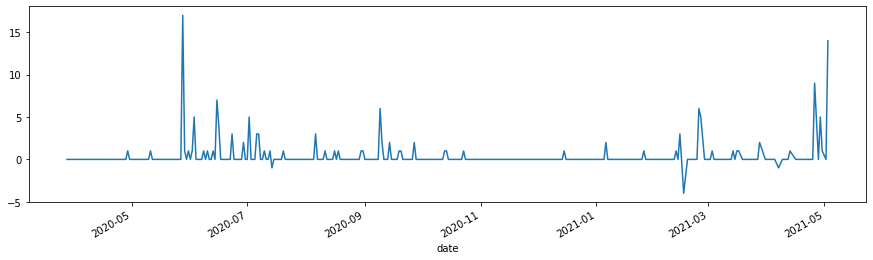

In [129]:
df_plot['deaths_by_day'].plot(figsize=(15,4))

Para quais datas esta acimada média de mortes?

Para quais datas esta acimada média de mortes?

In [130]:
df_plot['deaths_by_day'].mean()

0.3471502590673575

In [131]:
negativos = df_plot[df_plot.deaths_by_day < 0]

In [132]:
negativos

,deaths,deaths_by_day
date,,
2021-04-07,105,-1.0
2021-02-16,92,-4.0
2020-07-14,59,-1.0


Quero ver esses intervalos de dias para averiguar.

In [133]:
df_plot[(df_plot.index >= dateutil.parser.parse("2020-07-10")) & (df_plot.index <= dateutil.parser.parse("2020-07-18"))]

,deaths,deaths_by_day
date,,
2020-07-17,58,0.0
2020-07-16,58,0.0
2020-07-15,58,0.0
2020-07-14,59,-1.0
2020-07-13,58,1.0
2020-07-12,58,0.0
2020-07-11,58,0.0
2020-07-10,57,1.0


In [134]:
df_qxda[(df_qxda.date >= dateutil.parser.parse("2020-07-10")) & (df_qxda.date <= dateutil.parser.parse("2020-07-18"))]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1153658,2020-07-17,CE,Quixadá,city,2385,58,112,False,87728.0,88321.0,2311306.0,2700.37703,0.0243
1153659,2020-07-16,CE,Quixadá,city,2384,58,111,False,87728.0,88321.0,2311306.0,2699.24480,0.0243
1153660,2020-07-15,CE,Quixadá,city,2368,58,110,False,87728.0,88321.0,2311306.0,2681.12906,0.0245
1153661,2020-07-14,CE,Quixadá,city,2356,59,109,False,87728.0,88321.0,2311306.0,2667.54226,0.0250
1153662,2020-07-13,CE,Quixadá,city,2348,58,108,False,87728.0,88321.0,2311306.0,2658.48439,0.0247
1153663,2020-07-12,CE,Quixadá,city,2350,58,107,False,87728.0,88321.0,2311306.0,2660.74886,0.0247
1153664,2020-07-11,CE,Quixadá,city,2341,58,106,False,87728.0,88321.0,2311306.0,2650.55876,0.0248
1153665,2020-07-10,CE,Quixadá,city,2324,57,105,False,87728.0,88321.0,2311306.0,2631.31079,0.0245


Pelo visto nas três data estipuladas alguém retornou dos mortos.

Qual a média de mortos desconsiderando os dias sem mortes?

In [135]:
media_mortos = df_plot[df_plot['deaths_by_day']>0]['deaths_by_day'].mean()
mediana_mortos = df_plot[df_plot['deaths_by_day']>0]['deaths_by_day'].median()
max_mortos = df_plot[df_plot['deaths_by_day']>0]['deaths_by_day'].max()
list([max_mortos, media_mortos])

[17.0, 2.6923076923076925]

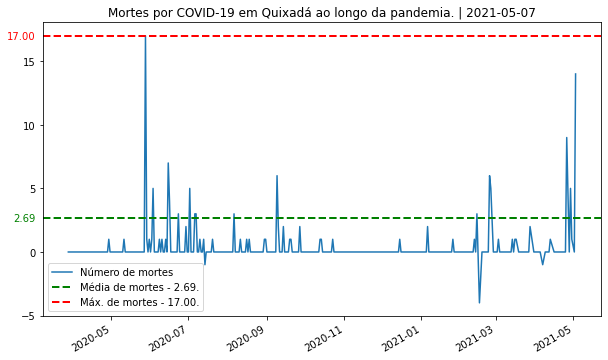

In [136]:
import matplotlib.transforms as transforms
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

mortes_plot = df_plot['deaths_by_day'].plot(figsize=(10,6), label="Número de mortes")

mortes_plot.set_title('Mortes por COVID-19 em Quixadá ao longo da pandemia. | '+datetime.today().strftime('%Y-%m-%d'))

# Criando as linhas horizontais com a média de mortos e max mortos
mortes_plot.axhline(y=media_mortos, xmin=0, xmax=1, color='g', linestyle='--', lw=2, label="Média de mortes - {num:.2f}.".format(num = media_mortos))
mortes_plot.axhline(y=max_mortos, xmin=0, xmax=1, color='r', linestyle='--', lw=2, label="Máx. de mortes - {num:.2f}.".format(num = max_mortos))

trans = transforms.blended_transform_factory(mortes_plot.get_yticklabels()[0].get_transform(), mortes_plot.transData)
mortes_plot.text(0,media_mortos, "{:0.2f}".format(media_mortos), color="green", transform=trans, ha="right", va="center")
mortes_plot.text(0,max_mortos, "{:0.2f}".format(max_mortos), color="red", transform=trans, ha="right", va="center")

mortes_plot.set_xlabel('')
#mortes_plot.set_ylabel('Example y')
mortes_plot.legend()


Quantas dias acima da média de mortos?

In [137]:
df_plot[df_plot['deaths_by_day']>media_mortos].count()

deaths           16
deaths_by_day    16
dtype: int64

## Tentando criar o dashboard

In [138]:
import ipywidgets as widgets

In [139]:
dados_casos = df[(df.state == 'CE') & (df.is_last == True) & (~pd.isnull(df['city']))]
dados_casos.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1099034,2021-05-04,CE,Abaiara,city,407,9,357,True,11737.0,11853.0,2300101.0,3433.72986,0.0221
1099391,2021-05-04,CE,Acarape,city,2570,24,366,True,14929.0,15036.0,2300150.0,17092.31179,0.0093
1099757,2021-05-04,CE,Acaraú,city,4338,93,367,True,62641.0,63104.0,2300200.0,6874.36613,0.0214
1100124,2021-05-04,CE,Acopiara,city,2659,107,371,True,54270.0,54481.0,2300309.0,4880.60058,0.0402
1100495,2021-05-04,CE,Aiuaba,city,378,9,350,True,17399.0,17493.0,2300408.0,2160.86435,0.0238


In [140]:
cidades_lista = df[(df.state == 'CE') & (df.is_last == True) & (~pd.isnull(df['city']))]['city'].tolist()
(cidades_lista)



['Abaiara',
 'Acarape',
 'Acaraú',
 'Acopiara',
 'Aiuaba',
 'Alcântaras',
 'Altaneira',
 'Alto Santo',
 'Amontada',
 'Antonina do Norte',
 'Apuiarés',
 'Aquiraz',
 'Aracati',
 'Aracoiaba',
 'Ararendá',
 'Araripe',
 'Aratuba',
 'Arneiroz',
 'Assaré',
 'Aurora',
 'Baixio',
 'Banabuiú',
 'Barbalha',
 'Barreira',
 'Barro',
 'Barroquinha',
 'Baturité',
 'Beberibe',
 'Bela Cruz',
 'Boa Viagem',
 'Brejo Santo',
 'Camocim',
 'Campos Sales',
 'Canindé',
 'Capistrano',
 'Caridade',
 'Caririaçu',
 'Cariré',
 'Cariús',
 'Carnaubal',
 'Cascavel',
 'Catarina',
 'Catunda',
 'Caucaia',
 'Cedro',
 'Chaval',
 'Chorozinho',
 'Choró',
 'Coreaú',
 'Crateús',
 'Crato',
 'Croatá',
 'Cruz',
 'Deputado Irapuan Pinheiro',
 'Ereré',
 'Eusébio',
 'Farias Brito',
 'Forquilha',
 'Fortaleza',
 'Fortim',
 'Frecheirinha',
 'General Sampaio',
 'Granja',
 'Granjeiro',
 'Graça',
 'Groaíras',
 'Guaiúba',
 'Guaraciaba do Norte',
 'Guaramiranga',
 'Hidrolândia',
 'Horizonte',
 'Ibaretama',
 'Ibiapina',
 'Ibicuitinga',
 'Ica

In [141]:
cidade = widgets.Dropdown(
    options=list(cidades_lista),
    value='Quixadá', #indicates default starting value
    description='Cidade:', #this is the label for the dropdown
)
# dados_casos[dados_casos.city == 'Quixadá']

In [142]:
def update_df_length(cidade):
    
    #df = pd.read_csv('SF_crimes.csv')
    df2 = dados_casos[dados_casos.city == cidade]
    
    print("Number of rows in the dataset that have been successfully loaded:"+str(df2.iloc[0]['confirmed']))

In [143]:
widgets.interactive(update_df_length, cidade=cidade)

interactive(children=(Dropdown(description='Cidade:', index=149, options=('Abaiara', 'Acarape', 'Acaraú', 'Aco…

## Tentando criar os plots

Pra criar o plot é preciso as colunas de data, cidade e casos confirmados.

In [144]:
casos_plot = df[(df.state == 'CE') & (~pd.isnull(df['city']))][['date', 'city', 'confirmed','deaths']]
casos_plot.head()

,date,city,confirmed,deaths
1099034,2021-05-04,Abaiara,407,9
1099035,2021-05-03,Abaiara,399,9
1099036,2021-05-02,Abaiara,390,9
1099037,2021-04-30,Abaiara,384,9
1099038,2021-04-29,Abaiara,380,8


In [145]:
cidade = widgets.Dropdown(
    options=list(cidades_lista),
    value='Quixadá', #indicates default starting value
    description='Cidade:', #this is the label for the dropdown
)

In [146]:
df3 = casos_plot[casos_plot.city == 'Quixadá'][['date','deaths']]
df3

,date,deaths
1153383,2021-05-04,134
1153384,2021-05-03,120
1153385,2021-05-02,120
1153386,2021-04-30,119
1153387,2021-04-29,114
...,...,...
1153765,2020-04-01,0
1153766,2020-03-31,0
1153767,2020-03-30,0
1153768,2020-03-29,0


In [147]:
def update_grafico(cidade):
    
    df3 = casos_plot[casos_plot.city == cidade][['date','deaths']]
    df3.set_index('date', inplace=True)
    df3.plot(figsize=(15,4))
    #df = pd.read_csv('SF_crimes.csv')
    #df3 = dados_casos[casos_plot.city == cidade]
    #df3['confirmed'].plot(figsize=(15,4))
    #df_plot.set_index('date', inplace=True)
    
    #print("Number of rows in the dataset that have been successfully loaded:"+str(df2.iloc[0]['confirmed']))

In [148]:
widgets.interactive(update_grafico, cidade=cidade)

interactive(children=(Dropdown(description='Cidade:', index=149, options=('Abaiara', 'Acarape', 'Acaraú', 'Aco…

Adicionar um comparativo de duas cidade seria bom.